Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

In [1]:
%%bash
cd ../chaste_build/
make CartilageSheetSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 16%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 22%] Built target chaste_ode
[ 38%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
[100%] Built target chaste_project_cartilage
[100%] Built target CartilageSheetSimulation


In [2]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
#plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

In [3]:
output_directory = 'exp-DirRestLengthPWQ/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 80.0' # final time 80h
flags = flags + ' --sw 8' # 8 cells in x direction
flags = flags + ' --sd 8' # 8 cells in y direction
flags = flags + ' --sh 4' # 4 cells in z direction
flags = flags + ' --pu 1' # 1 layer perichondrial cells above
flags = flags + ' --pl 1' # 1 layer perichondrial cells below
flags = flags + ' --nb 2' # both an upper and a lower rigid boundary
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0.0 (ratio 0.25)
flags = flags + ' --A 0.25' # proliferation rate of 25%
flags = flags + ' --F directional_rest_length_pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --psl 4'
flags = flags + ' --u 3.0' # set distance between boundaries to 3.0
#flags = flags + ' --cg ' # use a Cartesian grid for initial placement
flags = flags + ' --sc 1.2' # scale initial sheet to generate more space
flags = flags + ' --g1t 10.0' # g1 duration for transit cells
flags = flags + ' --ds 3.0' # s phase duration

#flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation'

In [4]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=6, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-DirRestLengthPWQ/20200701-092027/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F directional_rest_length_pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.0 --sc 1.2 --g1t 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-DirRestLengthPWQ/20200701-092027/ --S 1 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F directional_rest_length_pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.0 --sc 1.2 --g1t 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-DirRestLengthPWQ/20200701-092027/ --S 2 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F directional_rest_length_pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.0 --sc 1.2 --g1t 10.0 --ds 3.0
nice -n 19

In [5]:
de.run_postprocessing_multiple_random_seeds(6, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-DirRestLengthPWQ/20200701-092027/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-DirRestLengthPWQ/20200701-092027/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-DirRestLengthPWQ/20200701-092027/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-DirRestLengthPWQ/20200701-092027/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-DirRestLengthPWQ/20200701-092027/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-DirRestLengthPWQ/20200701-092027/5/results_from_time_0/']
Starting postprocessing with 2 processes


analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN axis encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN axis encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:106: RuntimeWarning: All-NaN slice encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(coordinates[:,2::3], axis=1))
analysis/sheet_metrics.py:106: RuntimeWarning: All-NaN axis encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.na

# Test if stacked honeycomb is stable (no proliferation)

- nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-DirRestLengthPWQ/20200625-144326/ --S 0 --sbt --T 20.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.0 --F directional_rest_length_pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.5 --sc 1.0 --g1t 10.0 --ds 3.0
- nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-DirRestLengthPWQ/20200625-145533/ --S 0 --sbt --T 20.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.0 --F directional_rest_length_pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.0 --sc 1.0 --g1t 10.0 --ds 3.0

Seems to work out. However there is the issue of cells being pushed out of the sheet for some reason o.O

# See if this helps with intercalation

Data
- 6 random seeds, perturbation of 0.1:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-DirRestLengthPWQ/20200625-145916/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F directional_rest_length_pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.0 --sc 1.0 --g1t 10.0 --ds 3.0
- 6 random seeds, perturbation of 0.1, scaling of 1.2
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-DirRestLengthPWQ/20200701-092027/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F directional_rest_length_pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.0 --sc 1.2 --g1t 10.0 --ds 3.0

Text(0,0.5,'Average patch projection area')

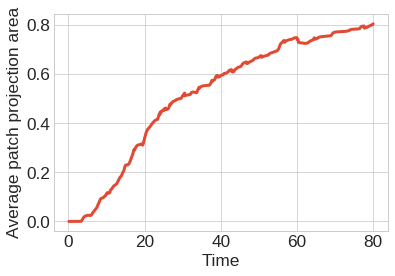

In [13]:
dir_directed = 'exp-DirRestLengthPWQ/20200625-145916/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d)
#plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Maybe with a little space

Text(0,0.5,'Average patch projection area')

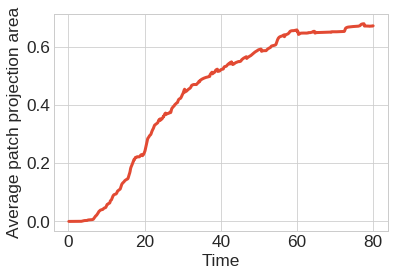

In [6]:
dir_directed = 'exp-DirRestLengthPWQ/20200701-092027/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d)
#plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')